In [2]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import .csv file and convert it to a DataFrame object

#df = pd.read_csv("Wholesale customers data.csv");

df = pd.read_csv("Universities.csv");
print(df.head())


       Univ   SAT  Top10  Accept  SFRatio  Expenses  GradRate
0     Brown  1310     89      22       13     22704        94
1   CalTech  1415    100      25        6     63575        81
2       CMU  1260     62      59        9     25026        72
3  Columbia  1310     76      24       12     31510        88
4   Cornell  1280     83      33       13     21864        90


In [4]:
#df.drop(['Channel','Region'],axis=1,inplace=True)
df.drop(['Univ'],axis=1,inplace=True)

In [5]:
array = df.values

In [6]:
array

array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [17]:
stscaler = StandardScaler().fit(array)
X = pd.DataFrame(stscaler.transform(array))

In [18]:
X

,0,1,2,3,4,5
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


In [19]:
dbscan = DBSCAN(eps=0.875, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.875, min_samples=6)

In [20]:
#Noisy samples are given the label -1.
set(dbscan.labels_)

{-1, 0, 1}

In [34]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [35]:
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,0
5,1
6,1
7,0
8,1
9,-1


In [36]:
clustered = pd.concat([df,cl],axis=1)

In [37]:
clustered[clustered['cluster']==0].mean()

SAT          1274.166667
Top10          82.000000
Accept         32.666667
SFRatio        12.166667
Expenses    22570.166667
GradRate       91.500000
cluster         0.000000
dtype: float64

In [38]:
clustered

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,1310,89,22,13,22704,94,0
1,1415,100,25,6,63575,81,-1
2,1260,62,59,9,25026,72,-1
3,1310,76,24,12,31510,88,-1
4,1280,83,33,13,21864,90,0
5,1340,89,23,10,32162,95,1
6,1315,90,30,12,31585,95,1
7,1255,74,24,12,20126,92,0
8,1400,91,14,11,39525,97,1
9,1305,75,44,7,58691,87,-1


In [39]:
clustered.mean()

SAT          1266.44
Top10          76.48
Accept         39.20
SFRatio        12.72
Expenses    27388.00
GradRate       86.72
cluster        -0.28
dtype: float64

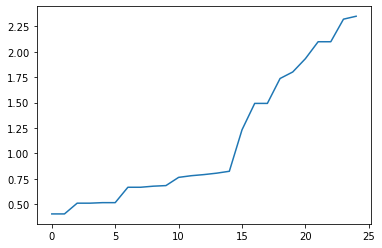

In [34]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)


#Plot the K distance graph

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [35]:
import seaborn as sns
from sklearn.metrics import silhouette_score
%matplotlib inline

In [36]:
print("Silhouette Coefficient: %0.3f"
      %silhouette_score(X,dbscan.labels_) )

Silhouette Coefficient: 0.069


In [41]:
silhouette_score(X, dbscan.labels_)

0.06870986188820744